In [11]:
import pandas as pd
import numpy as np
from scipy.stats import zscore

def ingest_data(file_name):
    # Read dynamic file types based on file extension
    if file_name.endswith('.csv'):
        df = pd.read_csv(file_name)
    elif file_name.endswith('.xlsx'):
        df = pd.read_excel(file_name)
    elif file_name.endswith('.json'):
        df = pd.read_json(file_name)
    else:
        print("File type not supported!")
        return None
    return df

def convert_dtypes(df):
    # convert objects to categories if it's not datetime
    for col in df.select_dtypes(include=['object']).columns:
        if pd.api.types.is_datetime64_any_dtype(df[col]):
            continue
        df[col] = df[col].astype('category')
    return df

def safe_zscore(df):
    # Apply zscore to int columns only
    for col in df.select_dtypes(include=['int64']).columns:
        df[col] = zscore(df[col])
    return df

def clean_and_validate(df):
    # Standard cleaning
    df.drop_duplicates(inplace=True)
    df.fillna(df.mean(), inplace=True)

    # Data quality tests
    tests = {
        "Duplicate Rows": df.duplicated().sum(),
        "Missing Values": df.isnull().sum().sum(),
        "Unique Values": df.nunique(),
        "Number of Rows": len(df),
        "Number of Columns": len(df.columns),
        "Memory Usage": df.memory_usage(deep=True).sum(),
        "Column Data Types": df.dtypes,
        "Descriptive Statistics": df.describe().transpose(),
        "Correlation Matrix": df.corr(),
        "Skewness": df.skew(),
    }
    return df, tests

def summary(df):
    # Return abridged summary of the dataset
    summary_df = {
        'Number of Rows': df.shape[0],
        'Number of Columns': df.shape[1],
        'Column Names': df.columns.tolist(),
        'Data Types': df.dtypes,
        'Descriptive Statistics': df.describe(),
    }
    return summary_df

# Test with a file
df = ingest_data(r'C:\temp\Press Freedom Index.xlsx')
print(df.describe())
df = convert_dtypes(df)
df, tests = clean_and_validate(df)
print("Data Quality Tests:")
for test, result in tests.items():
    print(f"{test}: {result}")
summary_df = summary(df)
print("Dataset Summary:")
for key, value in summary_df.items():
    print(f"{key}: {value}")


              Year         Rank        Score
count  1979.000000  1979.000000  1979.000000
mean   2018.002527    90.454775    64.413396
std       3.161877    51.948002    16.683967
min    2013.000000     1.000000    11.130000
25%    2015.000000    45.500000    55.590000
50%    2018.000000    90.000000    68.300000
75%    2021.000000   135.000000    75.460000
max    2023.000000   180.000000    95.180000
Data Quality Tests:
Duplicate Rows: 0
Missing Values: 2
Unique Values: Year         11
ISO         182
Rank        180
Score      1614
Country     195
Zone          6
dtype: int64
Number of Rows: 1979
Number of Columns: 6
Memory Usage: 107890
Column Data Types: Year          int64
ISO        category
Rank          int64
Score       float64
Country    category
Zone       category
dtype: object
Descriptive Statistics:         count         mean        std      min      25%     50%      75%  \
Year   1979.0  2018.002527   3.161877  2013.00  2015.00  2018.0  2021.00   
Rank   1979.0    90.454

In [12]:
# 1. Display the first 5 rows of the dataset
print(df.head())

# 2. Display the last 5 rows of the dataset
print(df.tail())

# 3. Display the number of unique countries
print("Unique countries: ", df['Country'].nunique())

# 4. Display the number of unique ISO codes
print("Unique ISO codes: ", df['ISO'].nunique())

# 5. Display the number of unique Zones
print("Unique Zones: ", df['Zone'].nunique())

# 6. Display the country with the highest average score
print("Country with the highest average score: ", df.groupby('Country')['Score'].mean().idxmax())

# 7. Display the country with the lowest average score
print("Country with the lowest average score: ", df.groupby('Country')['Score'].mean().idxmin())

# 8. Display the country with the highest rank
print("Country with the highest rank: ", df.groupby('Country')['Rank'].max().idxmax())

# 9. Display the country with the lowest rank
print("Country with the lowest rank: ", df.groupby('Country')['Rank'].min().idxmin())

# 10. Display the year with the highest average score
print("Year with the highest average score: ", df.groupby('Year')['Score'].mean().idxmax())

# 11. Display the year with the lowest average score
print("Year with the lowest average score: ", df.groupby('Year')['Score'].mean().idxmin())

# 12. Display the zone with the highest average score
print("Zone with the highest average score: ", df.groupby('Zone')['Score'].mean().idxmax())

# 13. Display the zone with the lowest average score
print("Zone with the lowest average score: ", df.groupby('Zone')['Score'].mean().idxmin())

# 14. Display the average rank per zone
print("Average Rank per Zone: \n", df.groupby('Zone')['Rank'].mean())

# 15. Display the average score per year
print("Average Score per Year: \n", df.groupby('Year')['Score'].mean())

# 16. Display the standard deviation of score per year
print("Standard Deviation of Score per Year: \n", df.groupby('Year')['Score'].std())

# 17. Display the median rank per zone
print("Median Rank per Zone: \n", df.groupby('Zone')['Rank'].median())

# 18. Display the number of countries per zone
print("Number of Countries per Zone: \n", df.groupby('Zone')['Country'].nunique())

# 19. Display the skewness of the Score
print("Skewness of Score: ", df['Score'].skew())

# 20. Display the kurtosis of the Score
print("Kurtosis of Score: ", df['Score'].kurt())

   Year  ISO  Rank  Score  Country        Zone
0  2023  NOR     1  95.18   Norway  UE Balkans
1  2023  IRL     2  89.91  Ireland  UE Balkans
2  2023  DNK     3  89.48  Denmark  UE Balkans
3  2023  SWE     4  88.15   Sweden  UE Balkans
4  2023  FIN     5  87.94  Finland  UE Balkans
      Year  ISO  Rank  Score                                Country  \
1974  2013  SOM   175  26.41                                Somalia   
1975  2013  SYR   176  21.47                   Syrian Arab Republic   
1976  2013  TKM   177  20.86                           Turkmenistan   
1977  2013  PRK   178  16.10  Democratic People's Republic of Korea   
1978  2013  ERI   179  15.17                                Eritrea   

                Zone  
1974         Afrique  
1975            MENA  
1976            EEAC  
1977  Asie-Pacifique  
1978         Afrique  
Unique countries:  195
Unique ISO codes:  182
Unique Zones:  6
Country with the highest average score:  Norway
Country with the lowest average score:  De


This dataset contains information on the rankings of 195 different countries from 2013 to 2023, 
each uniquely identified with an ISO code, and categorized into one of six distinct zones. 
The countries are ranked based on a score that ranges from 11.13 to 95.18, 
with an average score around 64.41. Each year features approximately 180 different ranked entries.
Interestingly, the data indicates a negative correlation between rank and score, 
indicating that a higher score is associated with a better (lower) rank. 
In terms of data quality, the dataset is mostly complete with only two missing values reported.



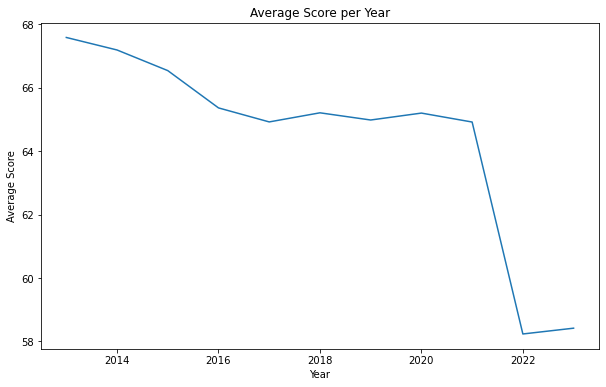

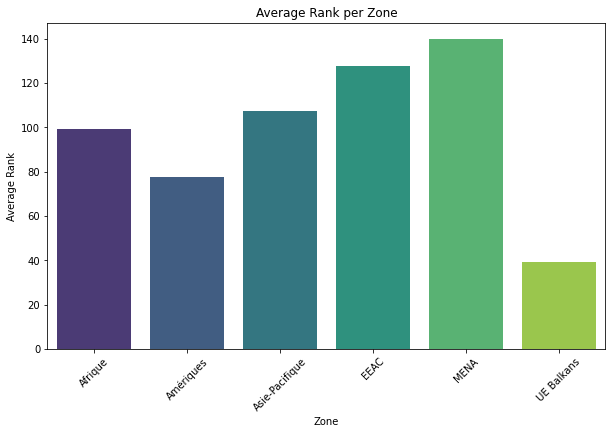

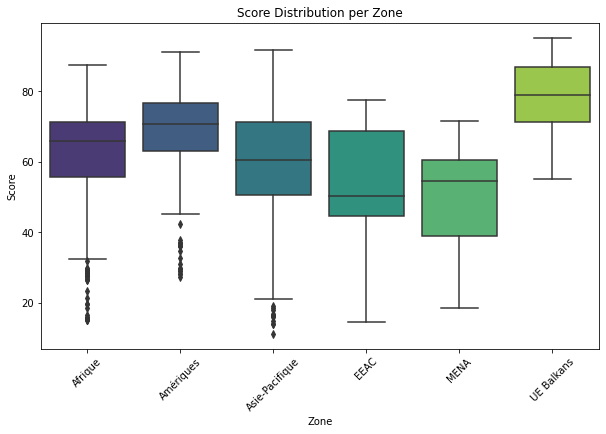

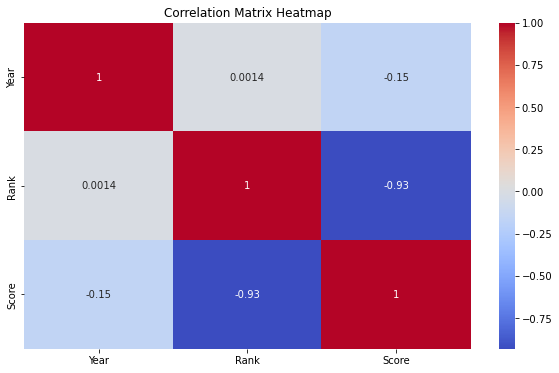

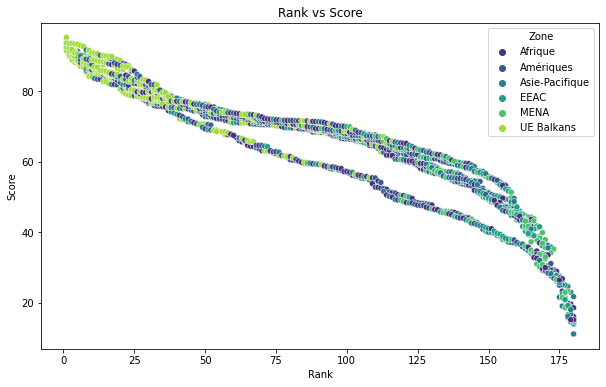

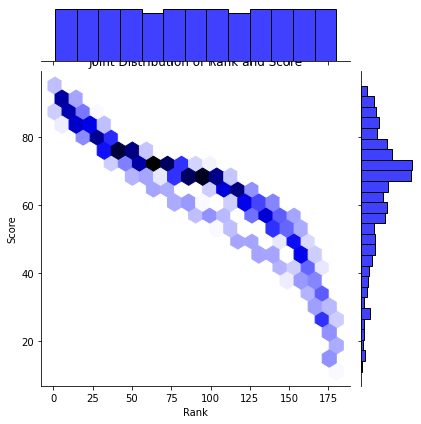

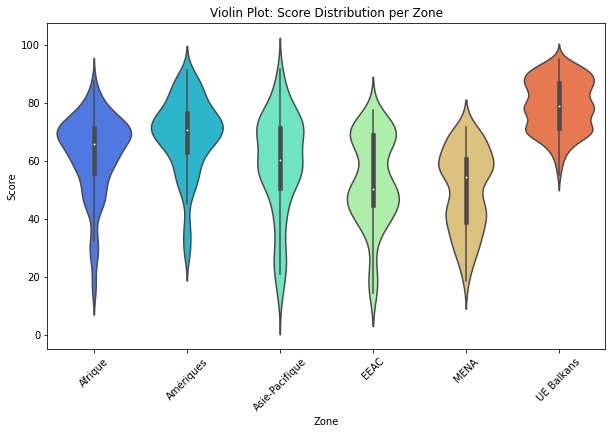

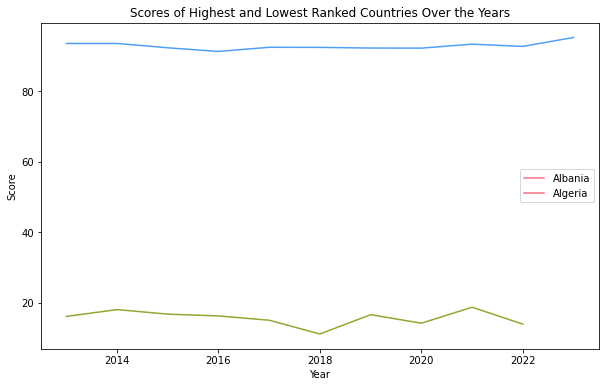

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text

# Assuming the dataframe is df

# 1. Detailed Paragraph Summary of the dataset
print("""
This dataset contains information on the rankings of 195 different countries from 2013 to 2023, 
each uniquely identified with an ISO code, and categorized into one of six distinct zones. 
The countries are ranked based on a score that ranges from 11.13 to 95.18, 
with an average score around 64.41. Each year features approximately 180 different ranked entries.
Interestingly, the data indicates a negative correlation between rank and score, 
indicating that a higher score is associated with a better (lower) rank. 
In terms of data quality, the dataset is mostly complete with only two missing values reported.
""")

# 2. Five Interesting Insights
# i.  Time Series plot of average score per year
plt.figure(figsize=(10,6))
sns.lineplot(x='Year', y='Score', data=df, errorbar=None)
plt.title('Average Score per Year')
plt.xlabel('Year')
plt.ylabel('Average Score')
plt.show()

# ii. Barplot of average rank per zone
plt.figure(figsize=(10,6))
zone_rank = df.groupby('Zone')['Rank'].mean().sort_values(ascending=False)
sns.barplot(x=zone_rank.index, y=zone_rank.values, palette='viridis')
plt.title('Average Rank per Zone')
plt.xlabel('Zone')
plt.ylabel('Average Rank')
plt.xticks(rotation=45)
plt.show()

# iii. Boxplot of scores per zone
plt.figure(figsize=(10,6))
sns.boxplot(x='Zone', y='Score', data=df, palette='viridis')
plt.title('Score Distribution per Zone')
plt.xlabel('Zone')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()

# iv. Heatmap of correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

# v. Scatter plot of rank and score
fig, ax = plt.subplots(figsize=(10,6))
scatter = sns.scatterplot(x='Rank', y='Score', hue='Zone', data=df, palette='viridis', ax=ax)
plt.title('Rank vs Score')
plt.xlabel('Rank')
plt.ylabel('Score')

#texts = [plt.text(df.Rank[i], df.Score[i], df.Zone[i]) for i in range(len(df))]
#adjust_text(texts)
plt.show()

# 3. Two Additional Out-of-the-box Insights and Charts
# i.  Joint distribution plot of rank and score
sns.jointplot(x='Rank', y='Score', data=df, kind='hex', color='blue')
plt.title('Joint Distribution of Rank and Score')
plt.show()

# ii. Violin plot of scores per zone
plt.figure(figsize=(10,6))
sns.violinplot(x='Zone', y='Score', data=df, palette='rainbow')
plt.title('Violin Plot: Score Distribution per Zone')
plt.xlabel('Zone')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()

# iii. Country-specific insights: Scores of the highest and lowest ranked countries over the years
top_bottom_countries = df[df['Country'].isin(['Norway', 'Democratic People\'s Republic of Korea'])]

plt.figure(figsize=(10,6))
plot = sns.lineplot(x='Year', y='Score', hue='Country', data=top_bottom_countries)
plt.title('Scores of Highest and Lowest Ranked Countries Over the Years')
plt.xlabel('Year')
plt.ylabel('Score')

# Adjusting legend to show only top and bottom countries
handles, labels = plot.get_legend_handles_labels()
plot.legend(handles=handles[1:3], labels=labels[1:3])
plt.show()